# Understanding of AUC

AUC is an important concept in binary classification.

We are going to descrbe what AUC is with an example

## Importing packages

In [62]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, Checkbox, IntRangeSlider

%matplotlib inline

## Gegerating sample data


### Generating students label

Say that there are 150 students, 50 of them study well, and the other 100 students didn't spend too much time to learn.

Although we should not judge a student simply base on whether he or she study well, for convenience, we call the 50 students who study well as "good" students, and the other 100 as "bad" students.

In [2]:
good_ones = np.ones(50)
bad_ones = np.zeros(100)

In [3]:
score_df = pd.DataFrame(np.concatenate((good_ones, bad_ones)))

In [4]:
score_df.columns = ['label']

In [5]:
score_df.head()

,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### Generating scores
Generating score for students.

For "good" students, they will get score between 60 to 100.
For "bad" students, they will get score between 0 to 59.

In [6]:
score_df['score'] = score_df['label'].map(\
                                          lambda x: np.rint(np.random.rand()*59) if x==0 \
                                          else 60 + np.rint(np.random.rand()*40))

In [7]:
score_df.sort_values(by='score', inplace=True)

In [8]:
score_df.reset_index(inplace=True, drop=True)

In [9]:
score_df.head(10)

,label,score
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,2.0
7,0.0,2.0
8,0.0,3.0
9,0.0,4.0


The following is the diagram of the students

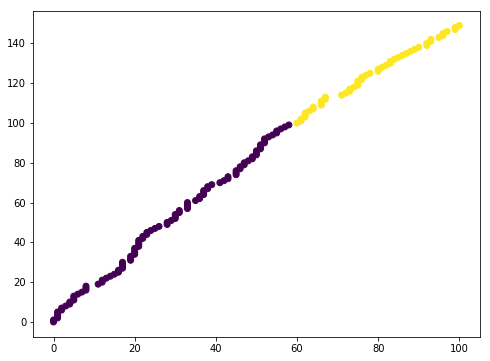

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(score_df['score'], score_df.index, c=score_df['label'])

In [11]:
number_good = list(score_df['label']).count(1)
number_good

50

In [12]:
number_bad = list(score_df['label']).count(0)
number_bad

100

## Understanding of TP, TN, FP, FN

Say that there is a teacher has no idea about the column "label", and he need to set a thresdhold to decide which student pass the exam.



### Extreme sample 1: Lowest bar
One extreme and lazy way is setting the threshold to 0, and let all the students pass the exam.

In [13]:
print('Then all the 150 students "pass" the exam')
print ('Infact, there are only ' + str(number_good) + ' students should pass the exam.')
print ('At the same time, there are ' + str(number_bad) + ' students "pass" the exam by teacher\'s mistake.')
print ('')
print('The number of "True Pass" (True Positive) TP is ' + str(number_good))
print('The number of "False Pass" (False Positive) FP is ' + str(number_bad))
print('The number of "True Not pass" (True Negative) TN is 0')
print('The number of "False Not pass" (False Negative) TN is 0')

Then all the 150 students "pass" the exam
Infact, there are only 50 students should pass the exam.
At the same time, there are 100 students "pass" the exam by teacher's mistake.

The number of "True Pass" (True Positive) TP is 50
The number of "False Pass" (False Positive) FP is 100
The number of "True Not pass" (True Negative) TN is 0
The number of "False Not pass" (False Negative) TN is 0


### Extreme sample 2: Highest bar
The other extreme and lazy way is setting the threshold to 100, and let all the students fail.

In [14]:
print('Then all the 150 students "not pass" the exam')
print('Infact, there are only ' + str(number_bad) + ' students should fail.')
print('At the sametime, there are '  + str(number_good) + ' students fail by teacher\'s mistake.') 
print('')
print('The number of "True Pass" (True Positive) TP is 0' )
print('The number of "False Pass" (False Positive) FP is 0' )
print('The number of "True Not pass" (True Negative) TN is ' + str(number_bad))
print('The number of "False Not pass" (False Negative) TN is '+ str(number_good))

Then all the 150 students "not pass" the exam
Infact, there are only 100 students should fail.
At the sametime, there are 50 students fail by teacher's mistake.

The number of "True Pass" (True Positive) TP is 0
The number of "False Pass" (False Positive) FP is 0
The number of "True Not pass" (True Negative) TN is 100
The number of "False Not pass" (False Negative) TN is 50


### Normal sample 1: Lower bar

One reasonable way is setting to score between 0 and 100, but sometimes the threshold may be lower than right one.

Say that the teacher set the threshold to 50

In [15]:
score_df['pass_50'] = score_df['score'].map(lambda x: 1 if x>=50 else 0)

In [16]:
number_pass_50 = list(score_df['pass_50']).count(1)
number_pass_50

66

In [17]:
number_not_pass_50 = list(score_df['pass_50']).count(0)
number_not_pass_50

84

In [18]:
print ('Now there are ' + str(number_pass_50) + ' students "pass" the exam.')
print ('And there are ' + str(number_not_pass_50) + ' students "not pass" the exam.')

Now there are 66 students "pass" the exam.
And there are 84 students "not pass" the exam.


In [19]:
print('The number of "True Pass" (True Positive) TP is ' + str(number_good))
print('The number of "False Pass" (False Positive) FP is ' + str(number_pass_50 - number_good))
print('The number of "True Not pass" (True Negative) TN is ' + str(number_not_pass_50))
print('The number of "False Not pass" (False Negative) TN is 0')

The number of "True Pass" (True Positive) TP is 50
The number of "False Pass" (False Positive) FP is 16
The number of "True Not pass" (True Negative) TN is 84
The number of "False Not pass" (False Negative) TN is 0


### Normal sample 2: Higher bar

One reasonable way is setting to score between 0 and 100, but sometimes the threshold may be higher than right one.

Say that the teacher set the threshold to 70

In [20]:
score_df['pass_70'] = score_df['score'].map(lambda x: 1 if x>=70 else 0)

In [21]:
number_pass_70 = list(score_df['pass_70']).count(1)
number_pass_70

36

In [22]:
number_not_pass_70 = list(score_df['pass_70']).count(0)
number_not_pass_70

114

In [23]:
print ('Now there are ' + str(number_pass_70) + ' students "pass" the exam.')
print ('And there are ' + str(number_not_pass_70) + ' students "not pass" the exam.')

Now there are 36 students "pass" the exam.
And there are 114 students "not pass" the exam.


In [24]:
print('The number of "True Pass" (True Positive) TP is ' + str(number_pass_70))
print('The number of "False Pass" (False Positive) FP is 0')
print('The number of "True Not pass" (True Negative) TN is ' + str(number_bad))
print('The number of "False Not pass" (False Negative) TN is ' + str(number_not_pass_70 - number_bad))

The number of "True Pass" (True Positive) TP is 36
The number of "False Pass" (False Positive) FP is 0
The number of "True Not pass" (True Negative) TN is 100
The number of "False Not pass" (False Negative) TN is 14


### Evaluating the result using threshold between 0 to 100

Now, imagine that you are the teacher, try to set the threshold and check the result

In [25]:
def plot(score):
    
    score_df['pass_d'] = score_df['score'].map(lambda x: 1 if x>=score else 0)
    
    score_df['TP'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==1) else 0 , axis=1)
    score_df['FP'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==1) else 0 , axis=1)
    score_df['TN'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==0) else 0 , axis=1)
    score_df['FN'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==0) else 0 , axis=1)
    
    number_TP = list(score_df['TP']).count(1)
    number_FP = list(score_df['FP']).count(1)
    number_TN = list(score_df['TN']).count(1)
    number_FN = list(score_df['FN']).count(1)
    
    plt.figure(figsize=(8,6))

    plt.bar(['TP', 'FP', 'TN', 'FN'], [number_TP, number_FP,number_TN,number_FN])
    
    print ('TP: You let ' + str(number_TP) + ' "good" students pass')
    print ('FP: You let ' + str(number_FP) + ' "bad" students pass')
    print ('TN: You let ' + str(number_TN) + ' "bad" students fail')
    print ('FN: You let ' + str(number_FN) + ' "good" students fail')
    
    

In [26]:
style = {'description_width': 'initial'}

@interact_manual(score=IntSlider(min=0, max=100, value=60, style=style),
    continuous_update=False
)
def plot_interact(score):
    plot(score)

interactive(children=(IntSlider(value=60, description='score', style=SliderStyle(description_width='initial'))…

### Get the results of all kind of threshold

We can let the program to evaluate each integer score from 0 to 100, remember all the number of TP, FP, TN, FN

In [27]:
all_result = list()
for i in range(0,101):
    score_df['pass_d'] = score_df['score'].map(lambda x: 1 if x>=i else 0)
    
    score_df['TP'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==1) else 0 , axis=1)
    score_df['FP'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==1) else 0 , axis=1)
    score_df['TN'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==0) else 0 , axis=1)
    score_df['FN'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==0) else 0 , axis=1)
    
    number_TP = list(score_df['TP']).count(1)
    number_FP = list(score_df['FP']).count(1)
    number_TN = list(score_df['TN']).count(1)
    number_FN = list(score_df['FN']).count(1)
    
    all_result.append([number_TP, number_FP, number_TN, number_FN])

In [28]:
all_result_array = np.array(all_result).T

Then display the number of TP, FP, TN, FN for threshold from 0 to 100

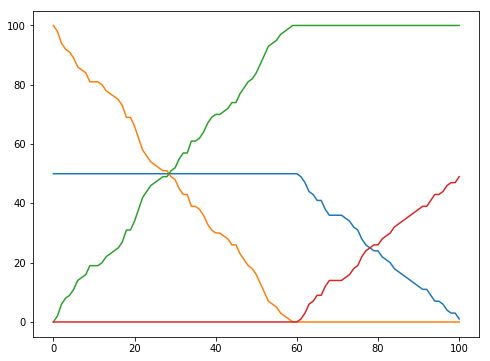

In [29]:
plt.figure(figsize=(8,6))

plt.plot(all_result_array[0])
plt.plot(all_result_array[1])
plt.plot(all_result_array[2])
plt.plot(all_result_array[3])


To make it clear, we can just display the TP and FP

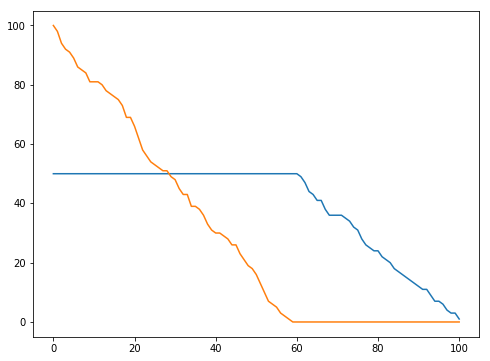

In [63]:
plt.figure(figsize=(8,6))

plt.plot(all_result_array[0])
plt.plot(all_result_array[1])


To normalize them, 

we can divide TP by number of "good" students

and divide FP by number of "bad" students

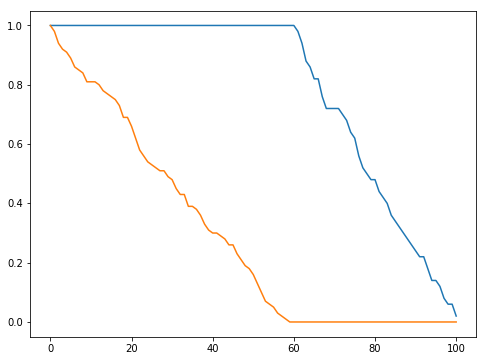

In [64]:
plt.figure(figsize=(8,6))

plt.plot(all_result_array[0]/number_good)
plt.plot(all_result_array[1]/number_bad)


What we need to do is finding a score to maximize the distance of these two curves

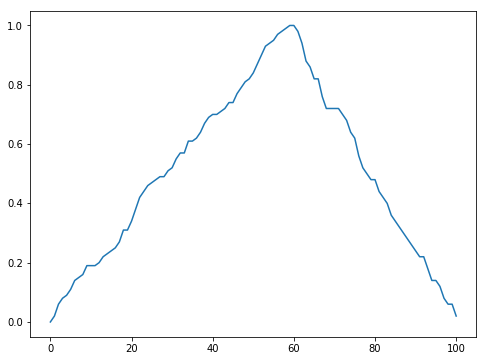

In [31]:
plt.figure(figsize=(8,6))

plt.plot(abs(all_result_array[0]/number_good - all_result_array[1]/number_bad))


In previous diagram, we can find out that score 60 is the right score to separate "good" students from "bad" students.

## What is a good exam?

We have discussed the threshold in previous cells.

Now, let's focus on the exam, and think about how to design a good exam.

The first exam we simulated is a good exam, as we can find a score (60) to seperate "good" students from "bad" students. The root cause is that there is no overlap of the score for "good" students and "bad" student.

In real life, that is not the case generally.

Let's genearte another exam to generate "score_1", in this exam, "good" students will get socre from 50 to 100, and "bad" students will get score from 0 to 70. 

In [32]:
score_df['score_1'] = score_df['label'].map(\
                                          lambda x: np.rint(np.random.rand()*69) if x==0 \
                                          else 50 + np.rint(np.random.rand()*50))

In [33]:
score_df.sort_values(by = "score_1", inplace=True)

In [34]:
score_df.reset_index(inplace=True, drop=True)

In [35]:
score_df.head()

,label,score,pass_50,pass_70,pass_d,TP,FP,TN,FN,score_1
0,0.0,1.0,0,0,0,0,0,1,0,0.0
1,0.0,5.0,0,0,0,0,0,1,0,0.0
2,0.0,31.0,0,0,0,0,0,1,0,0.0
3,0.0,8.0,0,0,0,0,0,1,0,0.0
4,0.0,21.0,0,0,0,0,0,1,0,1.0


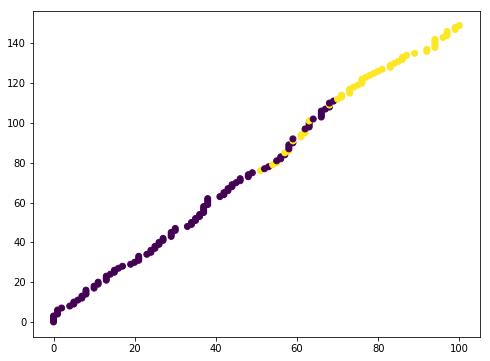

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(score_df['score_1'], score_df.index, c=score_df['label'])

and let's calculate the TP, TN, FP, FN

In [37]:
all_result = list()
for i in range(0,101):
    score_df['pass_d'] = score_df['score_1'].map(lambda x: 1 if x>=i else 0)
    
    score_df['TP'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==1) else 0 , axis=1)
    score_df['FP'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==1) else 0 , axis=1)
    score_df['TN'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==0) else 0 , axis=1)
    score_df['FN'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==0) else 0 , axis=1)
    
    number_TP = list(score_df['TP']).count(1)
    number_FP = list(score_df['FP']).count(1)
    number_TN = list(score_df['TN']).count(1)
    number_FN = list(score_df['FN']).count(1)
    
    all_result.append([number_TP, number_FP, number_TN, number_FN])

In [38]:
all_result_array_1 = np.array(all_result).T

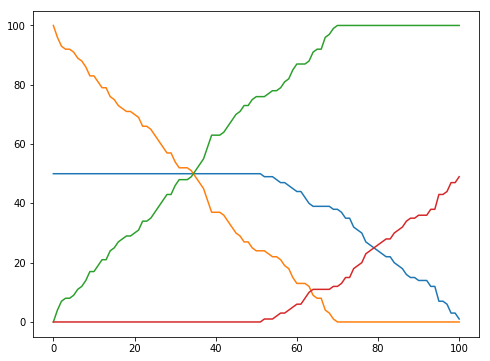

In [39]:
plt.figure(figsize=(8,6))

plt.plot(all_result_array_1[0])
plt.plot(all_result_array_1[1])
plt.plot(all_result_array_1[2])
plt.plot(all_result_array_1[3])

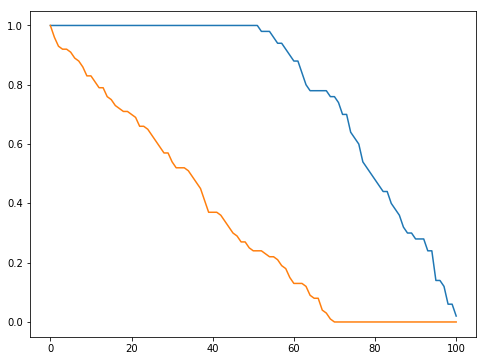

In [40]:
plt.figure(figsize=(8,6))

plt.plot(all_result_array_1[0]/number_good)
plt.plot(all_result_array_1[1]/number_bad)


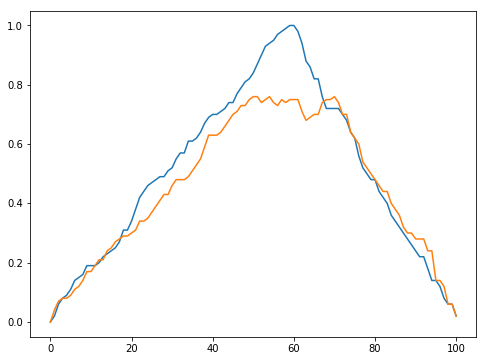

In [41]:
plt.figure(figsize=(8,6))

plt.plot(abs(all_result_array[0]/number_good - all_result_array[1]/number_bad))
plt.plot(abs(all_result_array_1[0]/number_good - all_result_array_1[1]/number_bad))


We can find that, because of the voerlap of the score, the second exam perform worse than the first one.

With the score of second exam (score_1), we can NOT find a score to seperate "good" students from "bad" students.

### Displaying TP rate and FP rate

In previous diagram, 

`all_result_array_1[1]/number_bad` is the FP rate, which is the FP/number_bad

`all_result_array_1[0]/number_good` is the TP rate, which is the TP/number_good


If we set the x axis to FP rate, and y axis to TP rate, we got the following diagram.

which is the ROC  (Receiver Operating Characteristic)

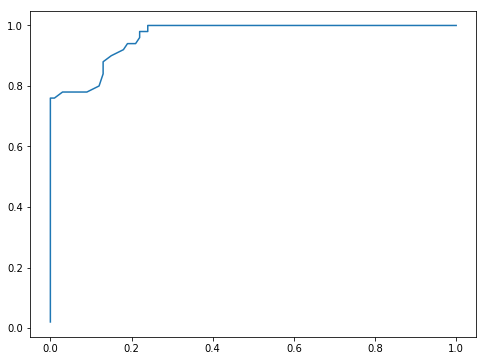

In [44]:
plt.figure(figsize=(8,6))

plt.plot( all_result_array_1[1]/number_bad, all_result_array_1[0]/number_good)

And the ROC of first exam is:

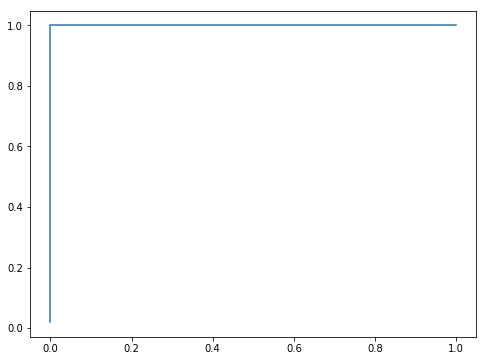

In [45]:
plt.figure(figsize=(8,6))

plt.plot( all_result_array[1]/number_bad, all_result_array[0]/number_good)

The second exam if worse than the first one, represented by the missing part of up left corner in second exam's ROC

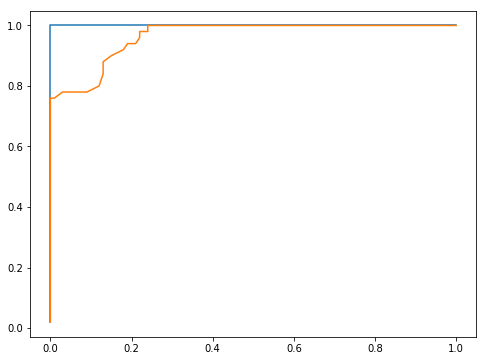

In [46]:
plt.figure(figsize=(8,6))

plt.plot( all_result_array[1]/number_bad, all_result_array[0]/number_good)
plt.plot( all_result_array_1[1]/number_bad, all_result_array_1[0]/number_good)


## Concept of AUC

So, the area under the ROC curve representing the effect of the exam.

We call the Area Under the Curve as AUC.

## Designing different exams to display different AUCs

Now, imagine that you are the teacher to design the exam.

What you can do is setting the score range of "good" students and the score range of "bad" students.

Try different score ranges, and theck the output of the AUC diagram.

In [60]:
def plot_auc(range_for_good, range_for_bad):

    (good_min, good_max) = range_for_good
    (bad_min, bad_max) = range_for_bad
    
    good_distance = good_max - good_min
    bad_distance = bad_max - bad_min
    
    score_df['score_d'] = score_df['label'].map(\
                                          lambda x: bad_min + np.rint(np.random.rand()*bad_distance) if x==0 \
                                          else good_min + np.rint(np.random.rand()*good_distance))
    
    all_result = list()
    for i in range(0,101):
        score_df['pass_d'] = score_df['score_d'].map(lambda x: 1 if x>=i else 0)

        score_df['TP'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==1) else 0 , axis=1)
        score_df['FP'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==1) else 0 , axis=1)
        score_df['TN'] = score_df.apply(lambda x: 1 if (x['label']==0 and x['pass_d']==0) else 0 , axis=1)
        score_df['FN'] = score_df.apply(lambda x: 1 if (x['label']==1 and x['pass_d']==0) else 0 , axis=1)

        number_TP = list(score_df['TP']).count(1)
        number_FP = list(score_df['FP']).count(1)
        number_TN = list(score_df['TN']).count(1)
        number_FN = list(score_df['FN']).count(1)

        all_result.append([number_TP, number_FP, number_TN, number_FN])
        
    auc_array = np.array(all_result).T
    
    plt.figure(figsize=(8,6))

    plt.plot( auc_array[1]/number_bad, auc_array[0]/number_good)
    


In [61]:

style = {'description_width': 'initial', 'width':'600'}

@interact_manual(range_for_good=IntRangeSlider(min=0, max=100, value=(60,100), style=style),
                 range_for_bad=IntRangeSlider(min=0, max=100, value=(0,59), style=style),
    continuous_update=False
)
def plot_interact(range_for_good, range_for_bad):
    plot_auc(range_for_good, range_for_bad)
    
    

interactive(children=(IntRangeSlider(value=(60, 100), description='range_for_good', style=SliderStyle(descript…

## Closing

While designing a Machine Learning model for binary classification scenario, you are supposed to design a good model to separate positive samples from negative samples, just like the teacher to design a good exam to separate "good" students from "bad" students.

So, if the AUC of your model is high, getting close to 1, you have designed a good model.

If the AUC of your model is close to 0.5, you have designed a bad model, which work as bad as random guessing.

If you find that the AUC of your model is very low, getting close to 0, don't worry, maybe you got a wrong label by mistake. What you need to do is simply switching the anwser.